# Pipelines avec Scikit-learn 
## Les Transformeurs et Estimateurs
### Introduction et pré-requis
Le package scikit-learn met à notre disposition une librairie de transformeurs qui nous permettent de nettoyer, réduire, augmenter et générer de nouveaux features sur une base de données.

Les transformeurs sont en général combinés avec un modèle afin de créer un **modèle dit composite**.    

L'objet **Pipeline ('canalisation' en français)** de scikit-learn nous permet d'enchaîner plusieurs transformations dans un seul objet qui remplit de multiples fonctions:

- **Encapsulation**: Avec un objet Pipeline, il suffit d'appeler une seule fois la méthode fit pour appliquer une série de transformations sur une base de données.
- **Sélection de paramètres** : L'outil GridSearch peut être utilisé pour chercher les paramètres optimaux sur tous les transformeurs et modèles de la Pipeline simultanément.
- **Isolation** : La Pipeline permet d'éviter la fuite de statistiques effectuées sur la base de test lors d'une validation croisée en garantissant que l'entraînement des transformeurs et du modèle est effectué à chaque itération de la validation croisée. Par exemple, en faisant une validation croisée classique sur une base déja normalisée, les moyennes et variances empiriques auront été calculées sur l'ensemble de la base et non sur la base d'entraînement, ce qui peut biaiser ses résultats.  

Afin d'aborder les modules sur l'objet Pipeline dans les meilleures conditions, il est impératif d'avoir validé les modules de Programmation orientée objet en Python, Pandas pour la datascience et Machine learning - modèles simples de classification (Python)

- **Les Estimateurs**
La **classe Estimator** contient tous les objets de scikit-learn que nous utilisons.   
Tous les objets de type classifieur, régresseur, algorithmes de clustering ou transformeurs qui nous permettent d'extraire des informations à partir d'une base de données héritent de la classe Estimator, qui est caractérisée par sa **méthode fit**.

La **méthode fit** de la classe Estimator permet de calculer les paramètres de l'estimateur sur une base de données.   
Ces paramètres sont ensuite stockés dans les attributs de l'instance Estimator ayant appelé la méthode.

Par exemple, la méthode fit de la sous-classe LogisticRegression va calculer les coefficients d'une régression logistique tandis que la méthode fit de la sous-classe StandardScaler va calculer les moyennes et variances de chaque variable d'une base. Ces sous-classes ont des utilités différentes mais sont toutes deux héritières de la classe Estimator.

- **Les Transformeurs**
Les transformeurs forment une **sous-classe** des objets de type **Estimator**.   
Ils sont caractérisés par leurs méthodes **fit et transform**. Ils sont aussi munis d'une méthode fit_transform qui fait appel aux deux méthodes l'une après l'autre.

La **méthode fit sert à calculer les paramètres de la transformation**. Par exemple, pour normaliser les données, on utilise le transformeur StandardScaler.   
La méthode fit de StandardScaler va calculer la moyenne empirique  μ  et l'écart-type empirique  σ  de chaque variable de la base de données, puis les stocker dans les attributs de l'instance StandardScaler qui a appelé la méthode.

Si la base contient  n  individus et  d  variables, la méthode transform va effectuer la transformation suivante:

∀1≤i≤n,∀1≤j≤d, 
Xji ⟼ (Xji−μj)/ σj

Pour être un transformeur, une classe doit impérativement avoir une méthode transform. Cette nuance sera importante lorsque les objets Pipeline seront introduits.

- Importer la classe StandardScaler contenue dans le sous-module sklearn.preprocessing.
- Importer la fonction rand contenue dans le sous-module numpy.random.
- Créer une matrice aléatoire de dimensions 3 x 4 grâce à la fonction rand et la stocker dans une variable X.
- Instancier un objet de type StandardScaler et le nommer scaler.
- Lancer la méthode fit de scaler sur la matrice X.

- En utilisant la **commande dir** qui liste tous les attributs d'un objet, trouver le nom des attributs qui contiennent le vecteur des moyennes et le vecteur des variances des colonnes de X.
- Lancer la méthode transform de scaler sur X et stocker le résultat de la méthode dans une variable Y.

In [2]:
from sklearn.preprocessing import StandardScaler 
from numpy.random import rand

X = rand(3, 4)                 # création d'une matrice aléatoire 3 x 4.
scaler = StandardScaler()      # instanciation du transformeur StandardScaler.

scaler.fit(X)                  # Calcul des espérances et écarts-types des colonnes de X et stockage dans l'objet scaler. pas de transformation à ce stade !

StandardScaler()

In [3]:
dir(scaler)                    # Affichage des attributs de scaler.

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_reset',
 '_validate_data',
 'copy',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'inverse_transform',
 'mean_',
 'n_features_in_',
 'n_samples_seen_',
 'partial_fit',
 'scale_',
 'set_params',
 'transform',
 'var_',
 'with_mean',
 'with_std']

In [4]:
Y = scaler.transform(X)        # Réduction et centrage de X.

Il faut **toujours lancer la méthode fit** d'un transformeur **au moins une fois* avant de pouvoir utiliser sa méthode transform.   

Dans le doute, utiliser la méthode **fit_transform** recalculera les paramètres de la transformation et appliquera ensuite la transformation.   

Utiliser fit_transform peut néanmoins être coûteux sur de grandes bases de données.  

- Instancier un deuxième objet StandardScaler et le nommer scaler2.
- Appliquer la méthode fit de scaler2 sur Y et afficher les vecteurs des moyennes et variances des colonnes de Y stockées dans scaler2. 
- D'où vient ce résultat?

In [5]:
scaler2 = StandardScaler()

scaler2.fit(Y)

print(scaler2.mean_)
print(scaler2.var_)

# Lorsqu'une matrice a été normalisée, la moyenne de chacune de ses colonnes est 0 (Centrage) 
# et leur écart-type est 1 (Réduction). 

# Si chaque colonne correspond à une variable d'une base de données,
# la normalisation permet de mettre toutes les variables à la même échelle et plus facilement comparer leurs distributions.

[ 4.07081776e-16 -3.25665421e-15  2.22044605e-16  0.00000000e+00]
[1. 1. 1. 1.]


Les transformeurs tels que StandardScaler, OneHotEncoder ou PolynomialFeatures sont des sous-classes de la classe base TransformerMixin. Cette classe ne contient que la méthode fit_transform. Toutes les sous-classes de TransformerMixin doivent impérativement définir les méthodes __init__, fit et transform afin de les utiliser comme des transformeurs.

   Les Mixins sont un type de classe particulier propre à Python et aux languages où il est possible de créer des classes qui héritent de plusieurs classes mères. Un Mixin contient en général des méthodes destinées à être utilisées par d'autres classes et n'est pas destiné à être utilisé seul.
Rappel sur l'inversion de matrices 2x2:

Soit  A = ( (a b) , (c d) )
        
On définit  detA = ad−bc  le déterminant de la matrice A.

Si  detA ≠ 0 , l'inverse de la matrice A se calcule ainsi :


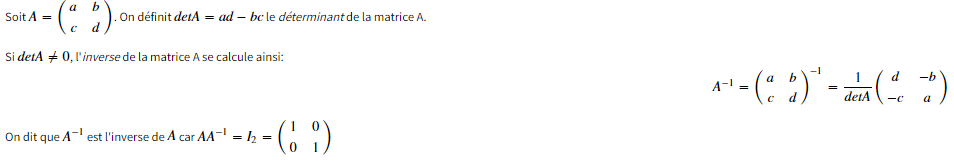

- Importer la classe TransformerMixin contenue dans le sous-module sklearn.base.
- Définir une classe Inverseur2x2 de la manière suivante:
    - Inverseur2x2 hérite de la classe TransformerMixin.
    - Sa méthode init ne prends pas d'arguments et initialise l'attribut det à 0.
    - Sa méthode fit calcule le déterminant d'une matrice 2x2 passée en paramètre et la stocke dans l'attribut det. Cette méthode doit retourner l'instance appelant la méthode.
    - Sa méthode transform retournera l'inverse de la matrice mais ne doit pas modifier la matrice d'origine.   
    
- Instanciez un objet Inverseur2x2 et le nommer inverseur.
- Créer une matrice aléatoire de dimensions 2 x 2 grâce à la fonction rand et la stocker dans une variable X.
- Calculer la matrice inverse de X grâce au transformeur inverseur.

Attention :   
   La méthode transform des transformeurs destinés à être utilisés dans une Pipeline **ne doivent jamais modifier la matrice passée en argument** et doivent absolument **retourner la transformation**.   
   Ceci est important car dans une Pipeline l'argument passé dans un transformeur est l'output du transformeur précédent et non la matrice d'origine.     
- De plus, la méthode fit doit impérativement retourner l'instance qui a appelé la méthode pour pouvoir utiliser la méthode fit_transform. Ceci est dû au fait que l'instruction transformer.fit_transform(X) revient à lancer l'instruction transformer.fit(X).transform(X).

## La classe FeatureUnion
La classe FeatureUnion permet de combiner plusieurs transformeurs en un transformeur qui concatène leurs outputs.   

Toutes les transformations sont effectuées en parallèle et non à la suite comme dans une Pipeline.   

Les transformations sont ensuite concaténées dans la matrice que retourne la FeatureUnion.

L'utilisation d'un objet FeatureUnion est identique à l'utilisation d'un transformeur.   

La méthode fit(resp. transform) de FeatureUnion fait simplement appel à la méthode fit(resp. transform) de chaque transformeur.

L'initialisation d'un objet FeatureUnion se fait en passant une liste de couples ('transformation', transformeur) en argument de son constructeur.

    from sklearn.pipeline import FeatureUnion
    from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
    poly = PolynomialFeatures(2)     # Calcule les features polynomiaux d'ordre 2
    std_scaler = StandardScaler()    # Centrage et réduction
    mm_scaler = MinMaxScaler()       # Normalisation min-max
    union = FeatureUnion([ ('poly_features', poly),
                           ('normalisation', std_scaler),
                           ('minmax_scaling', mm_scaler) ])

## Construction d'une Pipeline
La construction d'un objet de type Pipeline se fait par étape.   
Chaque étape correspond à une transformation effectuée sur l'output de la transformation précédente, la première transformation étant faite sur la base de données entrée en input de la Pipeline.

Le constructeur de la classe Pipeline contient un **paramètre steps**.   
Comme pour l'objet FeatureUnion, le paramètre steps prend en argument une liste de couples **('transformation', transformeur)**, mais effectue chaque transformation séquentiellement et non parallèlement comme FeatureUnion.  

Toutes les étapes d'une Pipeline doivent être des transformeurs sauf pour la dernière qui peut être un modèle ou un transformeur.

    from sklearn.pipeline import Pipeline
    from sklearn.svm import SVC                          #Modèle : Support vector Classifier
    from sklearn.preprocessing import StandardScaler     #Transformeur : Normalisation
    from sklearn.preprocessing import PolynomialFeatures #Transformeur : Features polynomiaux
    from sklearn.decomposition import PCA                #Transformeur : Analyse en Composantes Principales
    scaler = StandardScaler()             
    poly = PolynomialFeatures(2)
    pca = PCA()
    svc = SVC()
    composite_model = Pipeline(steps = [('normalisation', scaler),#étape 1: Normalisation des données
                                        ('poly_features', poly),  #étape 2: Calcul de features polynomiaux
                                        ('pca', pca),             #étape 3: Analyse Composantes Principales
                                        ('model', svc)])          #étape 4: Entraînement d'un SVC
La type du dernier estimateur de la Pipeline définit son utilisation:

Si la dernière étape est un modèle, la Pipeline doit être manipulée comme un modèle avec les méthodes fit, predict, score, etc.
Si la dernière étape est un transformeur, la Pipeline doit être manipulée comme un transformeur avec les méthodes fit, transform et fit_transform.
- Lancer la cellule suivante pour importer le dataset diabetes inclus dans scikit-learn.

In [6]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X = pd.DataFrame(load_diabetes().data)
y = pd.DataFrame(load_diabetes().target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1)

- Importer les transformeurs StandardScaler et PolynomialFeatures depuis le sous-module sklearn.preprocessing.
- Importer le modèle LinearRegression depuis le sous-module sklearn.linear_model.
- Importer la classe Pipeline depuis le sous-module sklearn.pipeline.

In [7]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

- Instancier un transformeur StandardScaler et le nommer scaler.
- Instancier un transformeur PolynomialFeatures qui devra calculer des features polynomiaux d'ordre 2 et le nommer poly.
- Instancier un modèle LinearRegression avec ses paramètres par défaut et le nommer linreg.

Créer une Pipeline nommée linreg_pipe à 3 étapes:
- 1 : Normalisation des données.
- 2 : Calcul des features polynomiaux.
- 3 : Entraînement d'un modèle de régression linéaire.  

Entraîner linreg_pipe sur X_train et y_train et comparer son score sur X_test et y_test à celui d'une régression linéaire classique.

In [8]:
scaler = StandardScaler()          # Transformeur : Normalisation
poly = PolynomialFeatures(2)       # Transformeur : Features polynomiaux
linreg = LinearRegression()        # Modèle : Régression linéaire


linreg_pipe = Pipeline(steps = [('normalization', scaler),            # Etape 1 : Normalisation
                                 ('poly_features', poly),             # Etape 2 : Calcul features polynomiaux
                                 ('linear_regression', linreg)])      # Etape 3 : Régression Linéaire
    
linreg_pipe.fit(X_train, y_train)                # Entrainement de la Pipeline

score_pipe = linreg_pipe.score(X_test, y_test)

linreg.fit(X_train, y_train)                     # Entrainement d'une régression linéaire classique avec paramètres par défaut
score_classique = linreg.score(X_test, y_test)

print("le score de la pipeline est: ", score_pipe)
print("le score de la régression linéaire classique est:", score_classique)

le score de la pipeline est:  0.22363432889108492
le score de la régression linéaire classique est: 0.4384360401733268


Recherche des paramètres optimaux d'une Pipeline
Comme pour un modèle scikit-learn classique, l'outil GridSearchCV peut être utilisé avec une Pipeline pour trouver ses paramètres optimaux.

L'utilisation de l'outil GridSearchCV sur un modèle classique se fait comme suit:

    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import Ridge            # Ridge = Régression Linéaire avec pénalité L²
    import numpy as np
    ridge = Ridge()
    parameters = { 'alpha' :  np.logspace(-5, 4, 50),  # recherche du alpha optimal entre 10^-5 et 10^4
                   'fit_intercept' : [True, False]}
    grid_search = GridSearchCV(estimator = ridge, param_grid = parameters, cv = 5, iid = True)
    grid_search.fit(X, y, cv = 10, iid = True)


Pour utiliser GridSearchCV avec une Pipeline, la définition de la grille des paramètres à tester doit se faire différement. On définit la Pipeline suivante :

    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures
    from sklearn.linear_model import Ridge
    scaler = StandardScaler()
    poly = PolynomialFeatures()
    ridge = Ridge()
    ridge_pipe = Pipeline( steps = [ ( 'normalization', scaler),    # Etape 1: Normalisation
                                     ( 'poly_features', poly),      # Etape 2: Calcul features polynomiaux
                                     ( 'ridge_regression', ridge)]) # Etape 3: Régression Ridge


Pour indiquer à l'outil GridSearchCV où trouver le paramètre à faire varier, le nom des paramètres doit être précédé par le nom de l'étape en séparant les deux noms par un double underscore '__':


   parameters = {'normalization__with_mean' : [True, False], #Param 'with_mean' de l'étape 'normalization' 
                  'normalization__with_std' : [True, False],  #Param 'with_std' de l'étape 'normalization'
                  'poly_features__degree' : [2, 3],           #Param 'degree' de l'étape 'poly_features'
                  'ridge_regression__alpha': np.logspace(-5, 4, 10)}
- Lancer la cellule suivante pour importer le dataset digits inclus dans scikit-learn.

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

X = pd.DataFrame(load_digits().data)
y = load_digits().target

- Importer le transformeur StandardScaler depuis le sous-module sklearn.preprocessing.
- Importer le transformeur SelectKBest depuis le sous-module sklearn.feature_selection.
- Importer le modèle SVC depuis le sous-module sklearn.svm.
- Importer la classe Pipeline depuis le sous-module sklearn.pipeline.
- Importer la classe GridSearchCV depuis le sous-module sklearn.model_selection.

- Instancier un transformeur StandardScaler et le nommer scaler.
- Instancier un transformeur SelectKBest et le nommer selector.
- Instancier un transformeur SVC et le nommer svc.

- Créer une Pipeline nommée svc_pipe à 3 étapes:
   - 1 : Normalisation des données.
   - 2 : Sélection des k meilleures variables.
   - 3 : Entraînement d'un modèle de classification par SVM.  
   
- Définir une grille de paramètres nommée params telle qu'on puisse tester le modèle SVC avec les 10, 20, 30, 40, 50, 64 meilleures variables et un noyau linéaire, polynomial et gaussien.   
Pour cela on rappelle que:

Le paramètre k de SelectKBest permet de définir le nombre de variables à sélectionner. Ce paramètre peut être un entier ou 'all' pour séléctionner toutes les variables.

le paramètre kernel de SVC peut prendre les valeurs 'linear', 'poly' et 'rbf' pour utiliser un noyau linéaire, polynomial ou gaussien.

In [ ]:
scaler = StandardScaler()  # Transformeur : Normalisation
selector = SelectKBest()   # Transformeur : Séléction de variables
svc = SVC()                # Modèle : Support Vector Classifier

svc_pipe = Pipeline([ ('scaling', scaler),       # Etape 1 : Normalisation des données
                      ('selection', selector),   # Etape 2 : Sélection des k meilleures variables
                      ('model', svc)])           # Etape 3 : Entrainement d'un modèle SVC

param_grid = {
    'selection__k' : [10, 20, 30, 40, 50, 'all'],  # On teste avec 10, 20, ... , 50 et toutes les variables de X
    'model__kernel' : ['poly', 'linear', 'rbf']    # On teste SVC avec noyau polynomial, linéaire et gaussien
}

- Instancier un objet GridSearchCV nommé grid avec les arguments suivants:
   - estimator = svc_pipe.
   - param_grid = params.
   - cv = 5.
   - iid = True.  
   
- Entraîner grid sur X et y.
- Afficher les meilleurs paramètres trouvés et le meilleur score obtenu grâce aux attributs bestparams et bestscore de la classe GridSearchCV.

In [ ]:
grid = GridSearchCV(estimator = svc_pipe, param_grid = param_grid, cv = 5, iid = True) # Instanciation d'une GridSearchCV

grid.fit(X,y)  # Entraînement de la GridSearchCV pour trouver les meilleurs paramètres de la pipeline.

print(grid.best_params_) # Affichage des meilleurs paramètres pour la pipeline svc_pipe.
print(grid.best_score_) # Affichage du score obtenu par validation croisée avec les meilleurs paramètres.

## Pipeline d'Estimateurs Personnalisés
Afin d'utiliser vos propres transformeurs avec GridSearchCV, il n'est pas suffisant d'hériter uniquement TransformerMixin.   
La classe BaseEstimator contient deux méthodes essentielles à GridSearchCV, get_params et set_params qui nous permettent d'intéragir avec les paramètres d'un estimateur.

Lorsque nous définissons une grille de paramètres pour GridSearchCV, la syntaxe 'nom_etape__nom_param' que nous utilisons est ce qui permet à ces méthodes de retrouver et modifier un paramètre d'un estimateur particulier.

Ces méthodes font parties de la classe BaseEstimator. Il suffit de définir un transformeur qui hérite de cette classe pour pouvoir l'utiliser avec GridSearchCV.

- Importer les classes BaseEstimator et TransformerMixin depuis le sous-module sklearn.base.  

Nous allons définir un transformeur ColumnBucketer qui permettra de découper une variable numérique telle que l'âge en segments de longueur uniforme afin de créer des catégories démographiques (par exemple [0, 10[, [10, 20[, [20, 30[, etc).

- Définir une classe ColumnBucketer qui hérite des classes BaseEstimator et TransformerMixin. Cette classe aura trois méthodes, __init__, fit et transform, définies de la façon suivante:

   - __init__: Le constructeur prend 2 arguments, column_name et bucket_size, qui seront les attributs d'une instance ColumnBucketer. column_name correspond au nom de la colonne qui devra être segmentée et    bucket_size à la longueur de chaque segment.

   - fit : Prend 2 arguments, un DataFrame X et une liste y, mais ne fait rien.

   - transform : Prend en argument un DataFrame X. Rajoute une colonne à X nommée column_name + "_Bucket" où column_name est l'attribut du ColumnBucketer. Les valeurs de cette nouvelle colonne seront calculées grâce à la formule X[self.column_name] // self.bucket_size * self.bucket_size où l'opérateur // correspond à la division entière.

La méthode fit d'un transformeur destiné à être utilisé dans une Pipeline avec un modèle doit prendre en argument les features X et la variable cible y .

Ceci est dû au fait que l'instruction ma_pipeline.fit(X,y) va lancer les instructions transformeur.fit(X,y) sur tous les transformeurs de la Pipeline et non transformeur.fit(X).

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnBucketer(BaseEstimator, TransformerMixin):
    # BaseEstimator contient les méthodes get_params et set_params.
    # TransformerMixin contient la méthode fit_transform.
    
    def __init__(self, column_name, bucket_size):
        self.column_name = column_name   # nom de la colonne à segmenter
        self.bucket_size = bucket_size   # longueur de chaque segment
        
    def fit(self, X, y):  # Ne fait rien
        return self
    
    def transform(self, X):  # Création de la nouvelle colonne 
        X[self.column_name + "_Bucket"] = X[self.column_name] // self.bucket_size * self.bucket_size
        return X

- Lancer la cellule suivante pour importer la base de données boston depuis la libraire scikit-learn

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

X = pd.DataFrame(load_boston().data, columns= load_boston().feature_names)
y = load_boston().target

import warnings
warnings.filterwarnings('ignore')

- Définir un transformeur ColumnDrop qui hérite des classes BaseEstimator et TransformerMixin. Cette classe aura trois méthodes, __init__, fit et transform, définies de la façon suivante:
   - __init__: Prend 1 argument column_to_drop qui correspond au nom de la colonne à enlever.
   - fit: Prend 2 arguments, un DataFrame X et une liste y, mais ne fait rien.
   - transform: Prend en argument DataFrame X et la retourne sans la colonne que nous voulions enlever.

- Importer la classe Pipeline depuis le sous-module sklearn.pipeline.
- Importer le modèle BayesianRidge depuis le sous-module sklearn.linear_model.
- Définir une Pipeline nommée byrdge_pipe à 5 étapes:
- Segmentation de la variable AGE en 5 parties.
   - Segmentation de la variable CRIM en 5 parties.
   - Suppression de la colonne AGE.
   - Suppression de la colonne CRIM.
   - Entraînement d'un modèle BayesianRidge.   
   
La segmentation des variables pourra se faire grâce au transformeur ColumnBucketer défini précédemment.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import BayesianRidge

## Instanciation des transformeurs de la pipeline
segmentation_age = ColumnBucketer(column_name = 'AGE', bucket_size = 5) 
segmentation_crim = ColumnBucketer(column_name = 'CRIM', bucket_size = 5)
column_drop_age =  ColumnDrop(column_to_drop = 'AGE')
column_drop_crim = ColumnDrop(column_to_drop = 'CRIM')

## Instanciation du modèle
byrdge = BayesianRidge()

## Définition de la pipeline
byrdge_pipe = Pipeline(steps = [('bucket_age', segmentation_age),  # Etape 1 : Segmentation de la colonne 'AGE'
                                ('bucket_crim', segmentation_crim),# Etape 2 : Segmentation de la colonne 'CRIM'
                                ('drop_age', column_drop_age),     # Etape 3 : Suppression de la colonne 'AGE'
                                ('drop_crim', column_drop_crim),   # Etape 4 : Suppression de la colonne 'CRIM'
                                ('model', byrdge)                  # Etape 5 : Entrainement d'un modèle BayesianRidge
                               ])

- Créer une grille de paramètres qui fera varier la longueur des segments des variables AGE et CRIM parmi les valeurs 3, 5 et 10 et fera varier les paramètres alpha_1 et alpha_2 du modèle BayesianRidge entre  10^−3  et  10^2  en 5 pas grâce à np.logspace.

- Importer la classe GridSearchCV depuis le sous-module sklearn.model_selection.
- Trouver les meilleurs paramètres de la Pipeline byrdge_pipe par validation croisée sur 5 ensembles.

In [ ]:
%%time 
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(byrdge_pipe, param_grid = params, cv = 5, iid = True)

grid.fit(X,y)

print('Le meilleur score obtenu est: ',grid.best_score_)
print('Les meilleurs paramètres trouvés sont :',grid.best_params_)